In [118]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [119]:
df = pd.read_csv("Heart_Disease.csv")

In [120]:
df.head()

,id,Age,Gender,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,work_type,smoking_status,Heart Disease
0,1,70.0,Female,4,130,322,0,2,109,0,2.4,2,3,3,Private,formerly smoked,Yes
1,2,67.0,Male,3,115,564,0,2,160,0,1.6,2,0,7,Self-employed,never smoked,No
2,3,57.0,Female,2,124,261,0,0,141,0,0.3,1,0,7,Private,never smoked,Yes
3,4,64.0,Female,4,128,263,0,0,105,1,0.2,2,1,7,Private,smokes,No
4,5,74.0,Male,2,120,269,0,2,121,1,0.2,1,1,3,Self-employed,never smoked,No


In [121]:
# Visualization
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       270 non-null    int64  
 1   Age                      264 non-null    float64
 2   Gender                   264 non-null    object 
 3   Chest pain type          270 non-null    int64  
 4   BP                       270 non-null    int64  
 5   Cholesterol              270 non-null    int64  
 6   FBS over 120             270 non-null    int64  
 7   EKG results              270 non-null    int64  
 8   Max HR                   270 non-null    int64  
 9   Exercise angina          270 non-null    int64  
 10  ST depression            270 non-null    float64
 11  Slope of ST              270 non-null    int64  
 12  Number of vessels fluro  270 non-null    int64  
 13  Thallium                 270 non-null    int64  
 14  work_type                2

In [122]:
df.drop('id', axis=1, inplace=True)

In [123]:
df.describe()

,Age,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,264.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.424242,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.183488,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,47.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [124]:
# Preprocessing

#Check for duplicates

duplicates = df.duplicated()
num_duplicates = duplicates.sum()        # Count the number of duplicate rows
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


In [125]:
# Handling nulls

print(df.isnull().sum())

Age                        6
Gender                     6
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
work_type                  9
smoking_status             6
Heart Disease              0
dtype: int64


In [126]:
print(df.isnull().sum())

Age                        6
Gender                     6
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
work_type                  9
smoking_status             6
Heart Disease              0
dtype: int64


In [127]:
mean_age = df['Age'].mean()

# Drop rows with missing values in 'Gender' column
df = df.dropna(subset=['Gender'])

# Fill missing values in 'Age' column using rounded mean age
df['Age'].fillna(round(mean_age), inplace=True)

# Check for remaining missing values
print(df.isnull().sum())

Age                        0
Gender                     0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
work_type                  9
smoking_status             6
Heart Disease              0
dtype: int64


In [128]:
from sklearn.impute import SimpleImputer
# Create a SimpleImputer object with the strategy set to 'most_frequent'
# The 'most_frequent' strategy is a good choice when dealing with categorical variables like 'work_type', 'smoking_status' 
imputer = SimpleImputer(strategy='most_frequent')
work_col = df['work_type'].values
work_imputed = imputer.fit_transform(work_col.reshape(-1,1))
df['work_type'] = work_imputed.reshape(-1)
print(df['work_type'])

0            Private
1      Self-employed
2            Private
3            Private
4      Self-employed
           ...      
265          Private
266          Private
267         Govt_job
268    Self-employed
269          Private
Name: work_type, Length: 264, dtype: object


In [129]:
df['smoking_status'] = df['smoking_status'].replace("Unknown", np.nan)
smoking_col = df['smoking_status'].values
smoking_imputed = imputer.fit_transform(smoking_col.reshape(-1,1))
df['smoking_status'] = smoking_imputed.reshape(-1)
print(df['smoking_status'])

0      formerly smoked
1         never smoked
2         never smoked
3               smokes
4         never smoked
            ...       
265             smokes
266       never smoked
267             smokes
268             smokes
269       never smoked
Name: smoking_status, Length: 264, dtype: object


In [130]:
# Check for invalid entries

print(df[df['Age'] < 0])

Empty DataFrame
Columns: [Age, Gender, Chest pain type, BP, Cholesterol, FBS over 120, EKG results, Max HR, Exercise angina, ST depression, Slope of ST, Number of vessels fluro, Thallium, work_type, smoking_status, Heart Disease]
Index: []


In [131]:
invalid_gender_mask = ~(df['Gender'].isin(['Male', 'Female']))
invalid_gender = df[invalid_gender_mask]
print(f"Rows with invalid gender values:\n{invalid_gender}")
invalid_values_mask = ~(df['Chest pain type'].isin([1, 2, 3, 4]))
invalid_values = df[invalid_values_mask]
print("Rows with invalid chest pain type: ", invalid_values)
invalid_chol_mask = (df['Cholesterol'] < 0) | (df['Cholesterol'] > 500)
invalid_chol = df[invalid_chol_mask]
print(invalid_chol)

Rows with invalid gender values:
Empty DataFrame
Columns: [Age, Gender, Chest pain type, BP, Cholesterol, FBS over 120, EKG results, Max HR, Exercise angina, ST depression, Slope of ST, Number of vessels fluro, Thallium, work_type, smoking_status, Heart Disease]
Index: []
Rows with invalid chest pain type:  Empty DataFrame
Columns: [Age, Gender, Chest pain type, BP, Cholesterol, FBS over 120, EKG results, Max HR, Exercise angina, ST depression, Slope of ST, Number of vessels fluro, Thallium, work_type, smoking_status, Heart Disease]
Index: []
    Age Gender  Chest pain type   BP  Cholesterol  FBS over 120  EKG results   
1  67.0   Male                3  115          564             0            2  \

   Max HR  Exercise angina  ST depression  Slope of ST   
1     160                0            1.6            2  \

   Number of vessels fluro  Thallium      work_type smoking_status   
1                        0         7  Self-employed   never smoked  \

  Heart Disease  
1            N

In [132]:
df = df.drop(1)

In [133]:
# Reset the index to sequential integers
df = df.reset_index(drop=True)

In [134]:
# Feature encoding
# One hot encoding: gender
# Label encoding: smoking status, work_type, 'Heart disease'
df = pd.get_dummies(df, columns=['Gender'], dtype=int)
print(df)

      Age  Chest pain type   BP  Cholesterol  FBS over 120  EKG results   
0    70.0                4  130          322             0            2  \
1    57.0                2  124          261             0            0   
2    64.0                4  128          263             0            0   
3    74.0                2  120          269             0            2   
4    65.0                4  120          177             0            0   
..    ...              ...  ...          ...           ...          ...   
258  52.0                3  172          199             1            0   
259  44.0                2  120          263             0            0   
260  56.0                2  140          294             0            2   
261  57.0                4  140          192             0            0   
262  67.0                4  160          286             0            2   

     Max HR  Exercise angina  ST depression  Slope of ST   
0       109                0           

In [135]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for column in df.columns:
    # Check if the column data type is object (categorical)
    if df[column].dtype == 'object':
        # Apply label encoding to the column
        df[column] = encoder.fit_transform(df[column])

print(df)

      Age  Chest pain type   BP  Cholesterol  FBS over 120  EKG results   
0    70.0                4  130          322             0            2  \
1    57.0                2  124          261             0            0   
2    64.0                4  128          263             0            0   
3    74.0                2  120          269             0            2   
4    65.0                4  120          177             0            0   
..    ...              ...  ...          ...           ...          ...   
258  52.0                3  172          199             1            0   
259  44.0                2  120          263             0            0   
260  56.0                2  140          294             0            2   
261  57.0                4  140          192             0            0   
262  67.0                4  160          286             0            2   

     Max HR  Exercise angina  ST depression  Slope of ST   
0       109                0           

In [136]:
df.dtypes

Age                        float64
Chest pain type              int64
BP                           int64
Cholesterol                  int64
FBS over 120                 int64
EKG results                  int64
Max HR                       int64
Exercise angina              int64
ST depression              float64
Slope of ST                  int64
Number of vessels fluro      int64
Thallium                     int64
work_type                    int32
smoking_status               int32
Heart Disease                int32
Gender_Female                int32
Gender_Male                  int32
dtype: object

In [137]:
# Removing Outliers
columns = ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression']
for col in columns:
    # calculate interquartile range
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    # calculate the outlier cutoff
    cut_off = IQR * 1.5
    lower, upper = Q1 - cut_off, Q3 + cut_off
    # identify outliers
    outliers = ( ( df[col] < lower) | (df[col] > upper) )
    index_label = df[outliers].index
    print(f'Number of outliers in {col}: {len(index_label)}')
    df.drop(index_label, inplace=True)

Number of outliers in Age: 0
Number of outliers in BP: 9
Number of outliers in Cholesterol: 4
Number of outliers in Max HR: 1
Number of outliers in ST depression: 3


In [138]:
# Feature Scaling
# Using Min-Max, it's sensitive to outliers that's why we handled outliers before
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
print(df)

          Age  Chest pain type        BP  Cholesterol  FBS over 120   
0    0.854167         1.000000  0.473684     0.837607           0.0  \
1    0.583333         0.333333  0.394737     0.576923           0.0   
2    0.729167         1.000000  0.447368     0.585470           0.0   
3    0.937500         0.333333  0.342105     0.611111           0.0   
4    0.750000         1.000000  0.342105     0.217949           0.0   
..        ...              ...       ...          ...           ...   
241  0.395833         0.333333  0.210526     0.440171           0.0   
242  0.312500         0.333333  0.342105     0.585470           0.0   
243  0.562500         0.333333  0.605263     0.717949           0.0   
244  0.583333         1.000000  0.605263     0.282051           0.0   
245  0.791667         1.000000  0.868421     0.683761           0.0   

     EKG results    Max HR  Exercise angina  ST depression  Slope of ST   
0            1.0  0.184211              0.0       0.631579          0.5 

In [139]:
# Feature Selection

#Visualizing corr
corr=df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Age,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,work_type,smoking_status,Heart Disease,Gender_Female,Gender_Male
Age,1.000000,0.086592,0.271387,0.194106,0.112294,0.112114,-0.413877,0.106645,0.189517,0.134081,0.384976,0.094452,0.044699,-0.055858,0.218022,-0.044840,0.044840
Chest pain type,0.086592,1.000000,-0.085799,0.071909,-0.118845,0.102328,-0.321896,0.359248,0.168491,0.117151,0.217882,0.284767,0.036527,0.103284,0.413210,0.103057,-0.103057
BP,0.271387,-0.085799,1.000000,0.181109,0.088335,0.119344,-0.063294,0.008718,0.154244,0.081241,0.062260,0.071748,-0.036813,-0.028360,0.115614,0.008017,-0.008017
Cholesterol,0.194106,0.071909,0.181109,1.000000,0.028292,0.127972,-0.050637,0.098091,-0.011259,-0.034226,0.141816,0.004356,0.093382,0.034041,0.165189,-0.114140,0.114140
FBS over 120,0.112294,-0.118845,0.088335,0.028292,1.000000,0.056643,0.008734,-0.030900,-0.025381,0.043149,0.128935,0.019556,-0.045259,-0.030794,-0.025409,0.064156,-0.064156
EKG results,0.112114,0.102328,0.119344,0.127972,0.056643,1.000000,-0.102676,0.128059,0.096241,0.159189,0.094139,-0.016185,0.087785,0.069216,0.210323,0.082609,-0.082609
Max HR,-0.413877,-0.321896,-0.063294,-0.050637,0.008734,-0.102676,1.000000,-0.389485,-0.359260,-0.375307,-0.312495,-0.305320,-0.017815,-0.021559,-0.440580,-0.088809,0.088809
Exercise angina,0.106645,0.359248,0.008718,0.098091,-0.030900,0.128059,-0.389485,1.000000,0.299797,0.252068,0.156613,0.341931,0.020124,0.058492,0.421232,0.223330,-0.223330
ST depression,0.189517,0.168491,0.154244,-0.011259,-0.025381,0.096241,-0.359260,0.299797,1.000000,0.586137,0.199213,0.282150,0.010694,-0.021011,0.429409,0.168571,-0.168571
Slope of ST,0.134081,0.117151,0.081241,-0.034226,0.043149,0.159189,-0.375307,0.252068,0.586137,1.000000,0.092413,0.259111,0.002346,0.020725,0.329988,0.100706,-0.100706


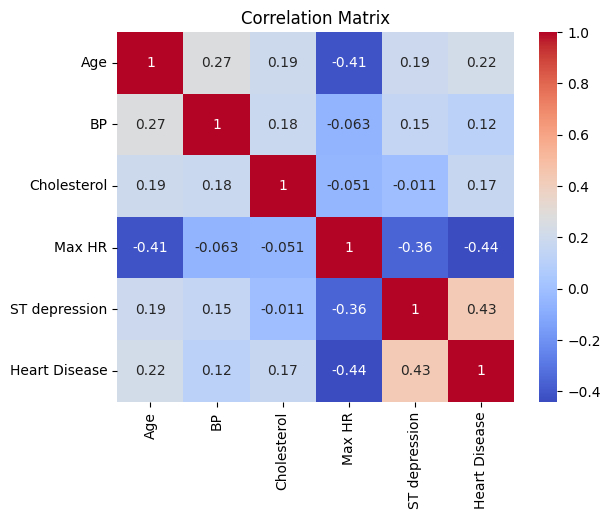

In [140]:
# Calculate the correlation matrix with continuous columns
corr_matrix = df[['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression', 'Heart Disease']].corr()
# Visualize the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [141]:
# Chi-sqaured test for all columns except continuous col
import scipy.stats as stats
from scipy.stats import chi2_contingency
df_copy = df.copy()
# select categorical variables
cat_vars = ['Chest pain type', 'FBS over 120', 'EKG results', 'Exercise angina', 'Slope of ST', 'Number of vessels fluro', 'Thallium', 'work_type', 'smoking_status', 'Gender_Female', 'Gender_Male']

# perform chi-squared test for each categorical variable
chi2_stats = []
p_vals = []
for var in cat_vars:
    contingency_table = pd.crosstab(df_copy[var], df_copy['Heart Disease'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi2_stats.append(chi2)
    p_vals.append(p)

# create a dataframe to store the results
results_df = pd.DataFrame({'Variable': cat_vars, 'Chi-squared statistic': chi2_stats, 'p-value': p_vals})

# sort the dataframe by p-value (ascending order)
sorted_results = results_df.sort_values('p-value')

# print the sorted results
print(sorted_results)

                   Variable  Chi-squared statistic       p-value
6                  Thallium              70.057677  6.125882e-16
0           Chest pain type              64.824948  5.467685e-14
5   Number of vessels fluro              60.324974  5.009739e-13
3           Exercise angina              41.846563  9.872416e-11
4               Slope of ST              36.373870  1.263323e-08
9             Gender_Female              26.643680  2.446497e-07
10              Gender_Male              26.643680  2.446497e-07
2               EKG results              11.640732  2.966520e-03
8            smoking_status               1.094380  5.785733e-01
7                 work_type               2.626885  6.220681e-01
1              FBS over 120               0.045901  8.303557e-01


In [ ]:
# interpretation of the chi-squared test results:

# The variable has a high chi-squared statistic and a very small p-value, This means that it is an important predictor of heart disease.
# EKG results: has a moderate chi-squared statistic and a not very small p-value, indicating that it may be weakly associated with Heart Disease.

In [108]:
df.drop('smoking_status', axis=1,inplace=True)
df.drop('work_type',axis=1,inplace=True)
df.drop('FBS over 120',axis=1, inplace=True)
print(df.head())

        Age  Chest pain type        BP  Cholesterol  EKG results    Max HR   
0  0.854167         1.000000  0.473684     0.837607          1.0  0.184211  \
1  0.583333         0.333333  0.394737     0.576923          0.0  0.464912   
2  0.729167         1.000000  0.447368     0.585470          0.0  0.149123   
3  0.937500         0.333333  0.342105     0.611111          1.0  0.289474   
4  0.750000         1.000000  0.342105     0.217949          0.0  0.456140   

   Exercise angina  ST depression  Slope of ST  Number of vessels fluro   
0              0.0       0.631579          0.5                 1.000000  \
1              0.0       0.078947          0.0                 0.000000   
2              1.0       0.052632          0.5                 0.333333   
3              1.0       0.052632          0.0                 0.333333   
4              0.0       0.105263          0.0                 0.000000   

   Thallium  Heart Disease  Gender_Female  Gender_Male  
0       0.0            

In [109]:
df.columns.values

array(['Age', 'Chest pain type', 'BP', 'Cholesterol', 'EKG results',
       'Max HR', 'Exercise angina', 'ST depression', 'Slope of ST',
       'Number of vessels fluro', 'Thallium', 'Heart Disease',
       'Gender_Female', 'Gender_Male'], dtype=object)

In [111]:
# Splitting the data into 4 parts: x_train , y_train, x_test and y_test
from sklearn.model_selection import train_test_split
x = df.drop(['Heart Disease'],axis=1)
y = df['Heart Disease']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [113]:
# Train Logistic Regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

In [114]:
# Train SVM model
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train, y_train)

SVC()

In [115]:
# Train Decision Tree (ID3) model
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [116]:
# Model Evaluation
log_y_predict=logreg.predict(x_test)
svm_y_predict=svm.predict(x_test)
tree_y_predict=logreg.predict(x_test)

from sklearn.metrics import accuracy_score
print("Logistic Regression Accuracy:", accuracy_score(y_test,log_y_predict))
print("SVM Accuracy:", accuracy_score(y_test,svm_y_predict))
print("Decision Tree Accuracy:", accuracy_score(y_test,tree_y_predict))

Logistic Regression Accuracy: 0.92
SVM Accuracy: 0.9
Decision Tree Accuracy: 0.92


In [142]:
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error

#confusion matrix 
print("Confusion Matrix - Logistic Regression:")
print(confusion_matrix(y_test, logreg.predict(x_test)))
print("Confusion Matrix - SVM:")
print(confusion_matrix(y_test, svm.predict(x_test)))
print("Confusion Matrix - Decision Tree:")
print(confusion_matrix(y_test, dt.predict(x_test)))

#classification Report
print("Classification Report - Logistic Regression:")
print(classification_report(y_test, logreg.predict(x_test)))
print("Classification Report - SVM:")
print(classification_report(y_test, svm.predict(x_test)))
print("Classification Report - Decision Tree:")
print(classification_report(y_test, dt.predict(x_test)))

#Mean Square Error
print("Mean Squared Error - Logistic Regression:", mean_squared_error(y_test, logreg.predict(x_test)))
print("Mean Squared Error - SVM:", mean_squared_error(y_test, svm.predict(x_test)))
print("Mean Squared Error - Decision Tree:", mean_squared_error(y_test, dt.predict(x_test)))

Confusion Matrix - Logistic Regression:
[[25  2]
 [ 2 21]]
Confusion Matrix - SVM:
[[25  2]
 [ 3 20]]
Confusion Matrix - Decision Tree:
[[18  9]
 [ 6 17]]
Classification Report - Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93        27
         1.0       0.91      0.91      0.91        23

    accuracy                           0.92        50
   macro avg       0.92      0.92      0.92        50
weighted avg       0.92      0.92      0.92        50

Classification Report - SVM:
              precision    recall  f1-score   support

         0.0       0.89      0.93      0.91        27
         1.0       0.91      0.87      0.89        23

    accuracy                           0.90        50
   macro avg       0.90      0.90      0.90        50
weighted avg       0.90      0.90      0.90        50

Classification Report - Decision Tree:
              precision    recall  f1-score   support

         0.0       0.75